#### [ 이미지 변환 - 크기 변경]
-	이미지 전처리 시 필수
-	수집된 이미지 크기가 모두 달라서 동일 크기를 맞추는 작업

In [39]:
# 컴퓨터 비전 모듈
import cv2
# 이미지 데이터 저장 모듈
import numpy as np
# 시각화 모듈 
import matplotlib.pyplot as plt
# 파일,폴더,경로 관련 모듈
import os

In [40]:
# [1-2] 데이터 준비

IMG_DIR = '../image/'
FILE_NAME ='image612x612.jpg'


In [41]:
# 이미지 읽어 오기
# 로딩 : 경로 + 파일명
color_img = cv2.imread( IMG_DIR+FILE_NAME, cv2.IMREAD_COLOR)

In [42]:
# 정보확인

if color_img.size > 0:
	#print(f'{ FILE_NAME}')
	#print(f'{color_img}\n ')
	print(f'형태:{color_img.shape},\n차원:{color_img.ndim}D')
else:
	print(f'{FILE_NAME}')
	print(f'형태 :{color_img.shape}')

형태:(408, 612, 3),
차원:3D


In [43]:
# [3-1] 이미지 축소
# 		이미지 데이터, (축소w, h)
down_image = cv2.resize(color_img,(100,100), interpolation=cv2.INTER_AREA)

print(f'형태 {down_image.shape}, 차원 {down_image.ndim}D')

형태 (100, 100, 3), 차원 3D


In [44]:
# [3-2] 이지미 확대 => 보간법 : cv2.INTER , cv2.INTER_CUBIC
# 이미지 데이터
up_image = cv2.resize(color_img,(850,850), interpolation=cv2.INTER_AREA)

print(f'형태 {up_image.shape}, 차원 {up_image.ndim}D')

형태 (850, 850, 3), 차원 3D


In [45]:
# [3-3] 축소,원본, 확대

cv2.imshow('origin', color_img) 
cv2.imshow('small', down_image) 
cv2.imshow('big', up_image) 
                         

# 이벤트처리
cv2.waitKey()
cv2.destroyAllWindows()

[3] OpenCV => matploylib 출력 <hr> 

In [46]:
# 시각화 기능 함수
def drawImage(row, col, imgList):
	fig, axes = plt.subplots(row,col)
	axes = axes.flatten() if col >=2 else [axes]

	for ax,img in zip(axes, imgList):
		ax.imshow(img)
		ax.set_title(f'{img.shape}')
		
	plt.tight_layout()
	plt.show()

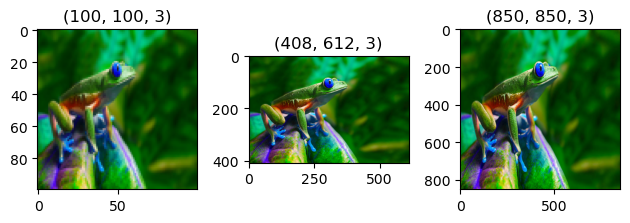

In [47]:
## 시각화
drawImage(1,3, [down_image,color_img,up_image])

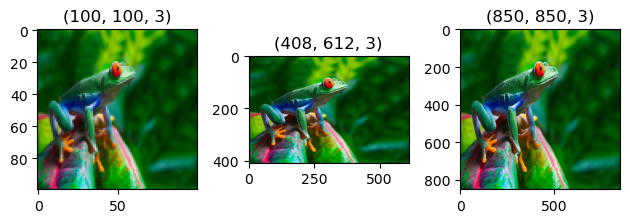

In [48]:
# -------------------------------------------------------
# opencv 채널순서 BGR ==> 일반 채널 순서 RGB 변환
# 	cv2.cvtColor(이미지 데이터, 변형형식)

down_image = cv2.cvtColor(down_image, cv2.COLOR_RGB2BGR)
color_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR)
up_image = cv2.cvtColor(up_image, cv2.COLOR_RGB2BGR)

## 시각화
drawImage(1,3, [down_image,color_img,up_image])

[5] 상대적 크기 이미지 축소/확대 <hr>

In [49]:
# [5-0] 현재 이미지 크기

H,W, _ = color_img.shape

print(f'현재 이미지 H : {H}, W: {W}')

현재 이미지 H : 408, W: 612


In [53]:
## [5-1] 이미지 축소 => 보관법 : cv2.INTER_AREA
#	이미지 데이터, (0,0) , fx=int(w*0.5), fy = int(H*0.5)

down_IMG = cv2.resize(color_img,  dsize= (0,0), fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)

print(f'형태 : {down_IMG .shape}, 차원 :{down_IMG.ndim}D')



형태 : (816, 1224, 3), 차원 :3D


In [54]:
## [5-2] 이미지 축소 => 보관법 : cv2.INTER_AREA
#	이미지 데이터, (0,0) , fx=int(w*0.5), fy = int(H*0.5)

up_IMG = cv2.resize(color_img, dsize= (0,0), fx=1.5, fy=1.2, interpolation=cv2.INTER_CUBIC)

print(f'형태 : {up_IMG.shape}, 차원 :{up_IMG.ndim}D')

형태 : (490, 918, 3), 차원 :3D


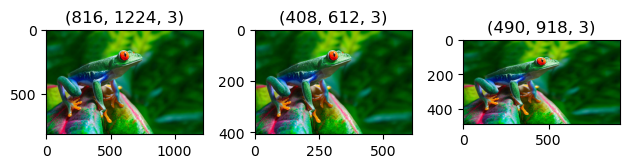

In [55]:
# -------------------------------------------------------
# opencv 채널순서 BGR ==> 일반 채널 순서 RGB 변환
# 	cv2.cvtColor(이미지 데이터, 변형형식)

down_IMG = cv2.cvtColor(down_IMG, cv2.COLOR_RGB2BGR)
color_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR)
up_IMG  = cv2.cvtColor(up_IMG , cv2.COLOR_RGB2BGR)

## 시각화
drawImage(1,3, [down_IMG,color_img,up_IMG])